In [43]:
import pickle
import xgboost as xgb

import pandas as pd
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_iris, load_digits, load_boston

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.RandomState(31337)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000019A92245A20>>
Traceback (most recent call last):
  File "C:\Users\Angel\AppData\Local\conda\conda\envs\py35\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


In [44]:
data = pd.read_csv("../data/train_data_features.csv").drop('Unnamed: 0', axis=1)
data.head()

,fake_news_score,click_bait_score,Content Title,Content Url,Content Published Time,Content,title_number_words,title_number_char,title_number_symbols,title_number_stopwords,title_avg_char_per_word,title_avg_caps_per_char,body_number_words,body_number_char,body_number_symbols,body_number_stopwords,body_avg_char_per_word,body_avg_caps_per_char
0,1,1,Камил Хабиб: ДАЕШ и „Ан Нусра” са нов терорист...,http://a-specto.bg/kamil-habib-daesh-i-nusra-s...,17.5.2017 18:35,"Интервю на Десислава Пътева с Камил Хабиб, дек...",10,58,1,3,4.600000,0.173913,1167,7345,194,519.0,5.083976,0.033878
1,1,1,ЧЕТИРИТЕ ТИПА ЖЕНИ СПОРЕД ИЗТОЧНИЯ КАЛЕНДАР,http://novini24online.com/jba/113526,17.5.2017 11:48,"Романтичната жена Това са жените, родени в год...",6,43,0,0,6.333333,1.000000,1686,11287,434,634.0,5.195136,0.038361
2,1,1,Арт - Людмила Ким почита премиера за Ванга,http://paper.standartnews.com/bg/article.php?a...,16.5.2017 21:36,"Людмила Ким, най-популярната руска лечителка и...",7,42,1,1,4.857143,0.117647,227,1472,41,84.0,5.277533,0.038397
3,3,3,Истина или не ! Истина ли е дали Бойко е гей и...,http://fakenews.bg/Истина-или-не-Истина-ли-е-д...,16.5.2017 19:40,Истина или не ! Истина ли е дали Бойко е гей и...,16,72,1,8,3.437500,0.109091,668,3727,77,333.0,4.414671,0.047135
4,1,1,"Видеото на Чарли Чаплин, в което няма да се см...",http://blife.eu/видеото-чарли-чаплин-което-ням...,16.5.2017 13:41,"Свикнали сме Чарли Чаплин да ни разсмива, да х...",10,51,2,6,4.000000,0.075000,603,3635,100,275.0,4.847430,0.026343


In [45]:
X = data.drop(['fake_news_score',
              "click_bait_score",
              "Content Title",
              "Content Url",
              "Content Published Time",
              "Content"], axis=1).as_matrix()

y = data.fake_news_score.as_matrix()
y = (y - 1) / 2

In [46]:
kf = KFold(y.shape[0], n_folds=2, shuffle=True, random_state=rng)
for train_index, test_index in kf:
    xgb_model = xgb.XGBClassifier().fit(X[train_index],y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(confusion_matrix(actuals, predictions))


[[ 61 386]
 [ 47 914]]
[[ 78 350]
 [ 98 881]]


In [47]:
xgb_model.score(X, y)

0.73321492007104794

In [31]:
data.fillna(value="", inplace=True)

In [25]:
import re
import pandas as pd

def sentence2wordlist(raw, language='bg+en'):
    """language: 'bg+en', 'bg', 'en', 'symbol'"""
    if language == 'bg+en':
        regex = "[^а-яА-Яa-zA-Z]"
    elif language == 'bg':
        regex = "[^а-яА-Я]"
    elif language == 'en':
        regex = "[^a-zA-Z]"
    elif language == 'symbol':
        regex = "[^-!$%^&*()_+|~=`{}\[\]:\";'<>?,.\/]"
    elif language == '!':
        regex = "[^?!]"
    clean = re.sub(regex," ", raw)
    words = clean.split()
    return words

In [27]:
data["title_len"] = data["Content Title"].apply(lambda x: len(sentence2wordlist(x)))

In [32]:
data["body_len"] = data["Content"].apply(lambda x: len(sentence2wordlist(x)))

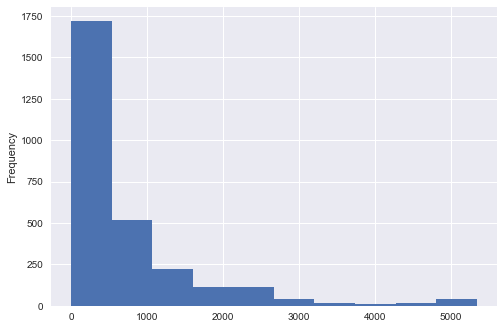

In [33]:
data.body_len.plot.hist()

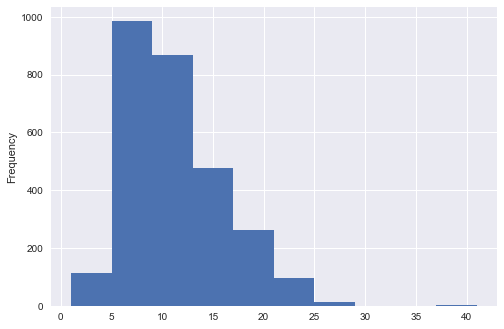

In [34]:
data.title_len.plot.hist()